In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


Data characteristics:
1. There are considerably more students from Group X than Group Y in this course of study.
2. Proportionately more students from Group Y are in jobs unrelated to their course of study.
3. The distribution of students among various industries is considerably different between the
two student groups.
4. Students from Group X tend to command higher salaries, for the same type of job & industry.
5. The salary differential between the two student groups differs by job nature and industry.

In [2]:
# Data
data = {
    'Industry': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Others'],
    'Job Nature': ['Closely related to course of study'] * 4 + ["Somewhat related to course of study"] * 4 + ['Unrelated to course of study'],
    "X's Median Salary": [3150, 3300, 2650, 2400, 4100, 3400, 2800, 2300, 2900],
    "X's Count": [83, 53, 47, 12, 30, 23, 12, 8, 21],
    "Y's Median Salary": [3000, 3100, 2600, 2400, 3900, 3150, 2600, 2200, 1900],
    "Y's Count": [23, 9, 32, 15, 3, 7, 22, 11, 28]
}

df = pd.DataFrame(data)


In [3]:
sns.color_palette("Set2").as_hex()

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [4]:
sns.color_palette("Set2").as_hex()[:]

['#66c2a5',
 '#fc8d62',
 '#8da0cb',
 '#e78ac3',
 '#a6d854',
 '#ffd92f',
 '#e5c494',
 '#b3b3b3']

In [5]:
group_col = ['#66c2a5', '#fc8d62']

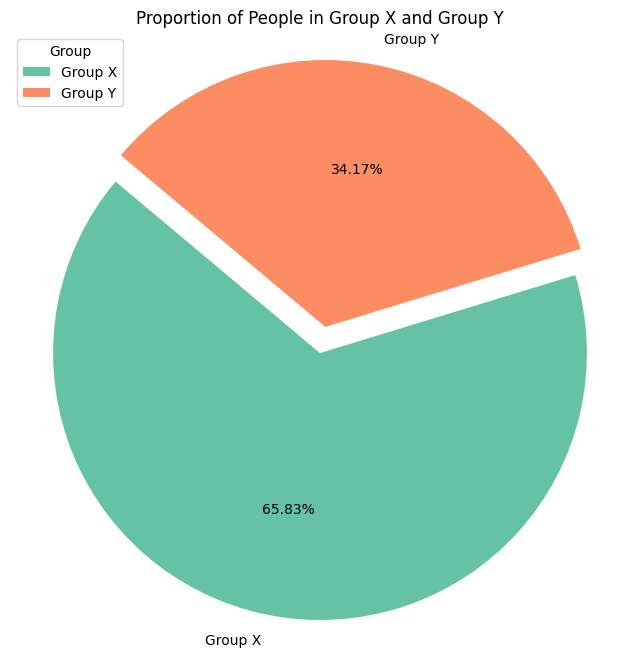

In [6]:
# Data
pie_chart_data = {
    'Group': ['Group X', 'Group Y'],
    'Count': [df["X's Count"].sum(), df["Y's Count"].sum()]
}

pie_chart_df = pd.DataFrame(pie_chart_data)

# Create a pie chart
plt.figure(figsize=(8, 8))  
explode = (0.1, 0)  

plt.pie(pie_chart_df['Count'], labels=pie_chart_df['Group'], colors=group_col, autopct='%1.2f%%', startangle=140, explode=explode)
plt.title("Proportion of People in Group X and Group Y")
plt.axis('equal')  
# Add a legend
plt.legend(pie_chart_df['Group'], title='Group', loc='upper left')

plt.show()



There are considerable more people in Group X (65.83%) than Group Y (34.17%).

In [7]:
grouped_job_nature_df = df.groupby('Job Nature')[["X's Count", "Y's Count"]].sum()

# Calculate the total count of people within each job nature
total_counts = grouped_job_nature_df["X's Count"] + grouped_job_nature_df["Y's Count"]

# Calculate the proportion rate for each group
grouped_job_nature_df["X's Proportion"] = grouped_job_nature_df["X's Count"] / total_counts
grouped_job_nature_df["Y's Proportion"] = grouped_job_nature_df["Y's Count"] / total_counts
print(grouped_job_nature_df)



                                     X's Count  Y's Count  X's Proportion  \
Job Nature                                                                  
Closely related to course of study         195         79        0.711679   
Somewhat related to course of study         73         43        0.629310   
Unrelated to course of study                21         28        0.428571   

                                     Y's Proportion  
Job Nature                                           
Closely related to course of study         0.288321  
Somewhat related to course of study        0.370690  
Unrelated to course of study               0.571429  


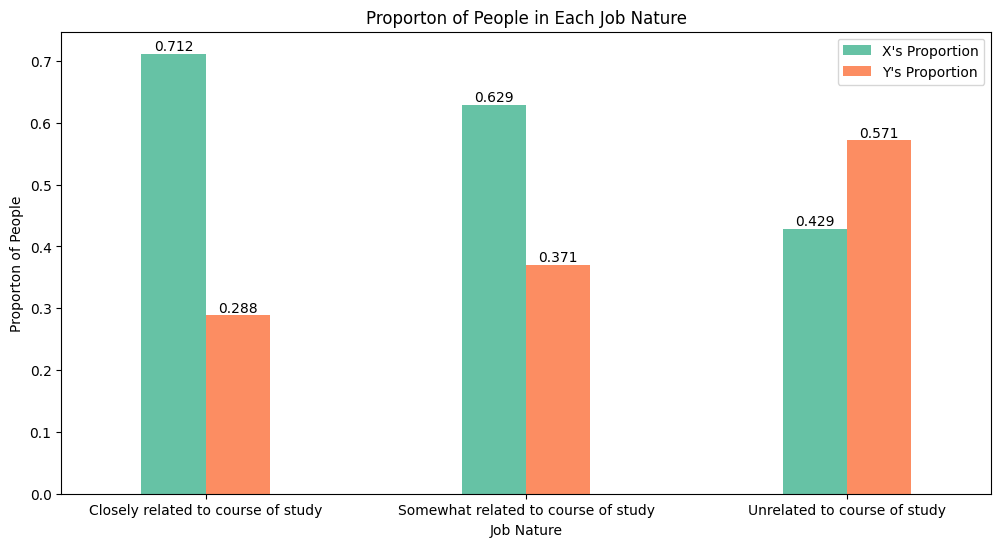

In [8]:
ax = grouped_job_nature_df[["X's Proportion","Y's Proportion"]].plot(kind='bar', figsize=(12, 6), color=group_col, width=0.4, position=0.5)

# annotate
ax.bar_label(ax.containers[0], label_type='edge',fmt='%.3f')
ax.bar_label(ax.containers[1], label_type='edge',fmt='%.3f')

plt.title("Proporton of People in Each Job Nature")
plt.xlabel("Job Nature")
plt.ylabel("Proporton of People")
plt.xticks(rotation=0)
plt.grid(False)


There is a higher proportion of people in Group Y who holds a job that is unrelated to the course of study.

In [9]:
melted_count_df = pd.melt(
    frame=df[['Industry', "X's Count", "Y's Count"]],
    id_vars=['Industry'],
    var_name='Group',
    value_name='Count'
)

print(melted_count_df)

   Industry      Group  Count
0         A  X's Count     83
1         B  X's Count     53
2         C  X's Count     47
3         D  X's Count     12
4         E  X's Count     30
5         F  X's Count     23
6         G  X's Count     12
7         H  X's Count      8
8    Others  X's Count     21
9         A  Y's Count     23
10        B  Y's Count      9
11        C  Y's Count     32
12        D  Y's Count     15
13        E  Y's Count      3
14        F  Y's Count      7
15        G  Y's Count     22
16        H  Y's Count     11
17   Others  Y's Count     28


/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_46674/23238020.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=melted_count_df, x='Industry', y="Count", hue='Group', dodge=True, palette=group_col, ci=None)
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be re

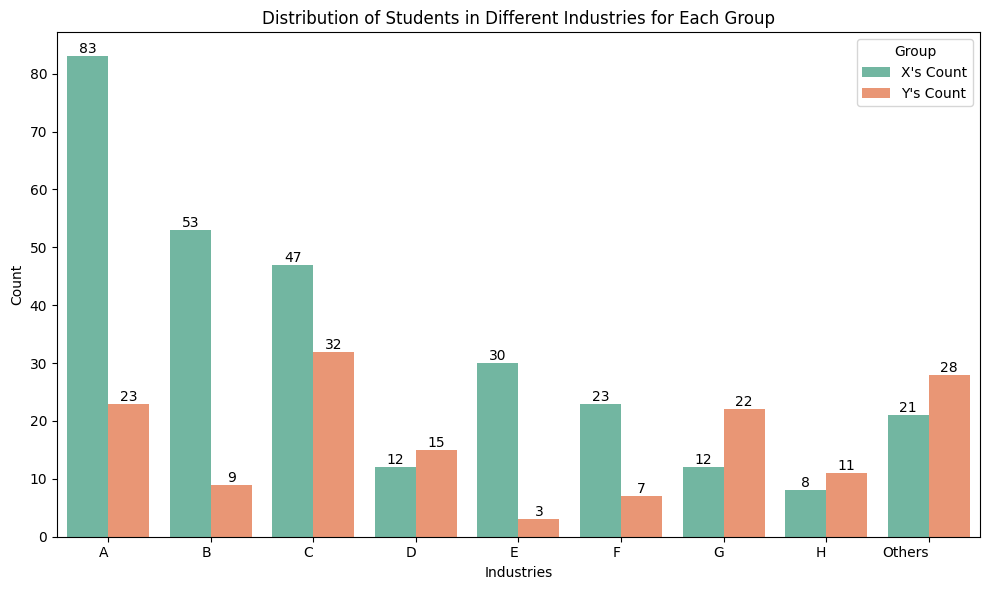

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_count_df, x='Industry', y="Count", hue='Group', dodge=True, palette=group_col, ci=None)
plt.title("Distribution of Students in Different Industries for Each Group")
plt.xlabel("Industries")
plt.ylabel("Count")
# annotate
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

In [11]:
melted_salary_df = pd.melt(
    frame=df[['Industry', "X's Median Salary", "Y's Median Salary"]],
    id_vars=['Industry'],
    var_name='Group',
    value_name='Median Salary'
)

/var/folders/s6/41_4v1b11gvf7352q3dxgbl80000gn/T/ipykernel_46674/3069789731.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=melted_salary_df, x='Industry', y="Median Salary", hue='Group', dodge=True, palette=group_col, ci=None)
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yings/Desktop/govtech/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

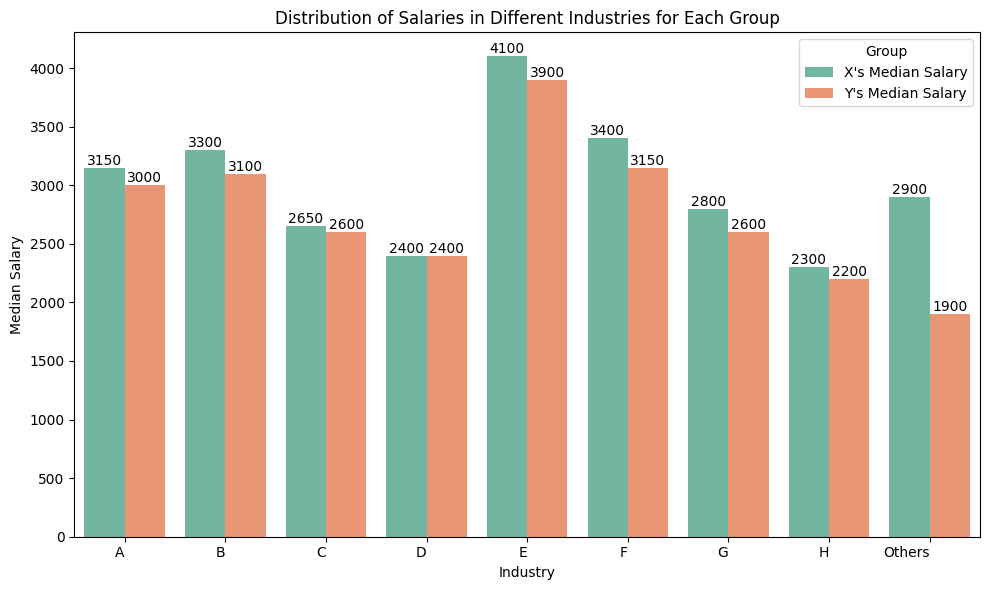

In [12]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted_salary_df, x='Industry', y="Median Salary", hue='Group', dodge=True, palette=group_col, ci=None)
plt.title("Distribution of Salaries in Different Industries for Each Group")
plt.xlabel("Industry")
plt.ylabel("Median Salary")
# annotate
plt.xticks(rotation=0, ha='right')
plt.tight_layout()
plt.grid(False)
for i in ax.containers:
    ax.bar_label(i,)

Median salaries for Group X are generally higher than that of Group Y for the same industries, except in Industry D where both groups have the same median salary of 2400.

In [13]:
df["Salary Difference Between Group X and Group Y (X-Y)"] = df["X's Median Salary"] - df["Y's Median Salary"]
print(df)

  Industry                           Job Nature  X's Median Salary  X's Count  \
0        A   Closely related to course of study               3150         83   
1        B   Closely related to course of study               3300         53   
2        C   Closely related to course of study               2650         47   
3        D   Closely related to course of study               2400         12   
4        E  Somewhat related to course of study               4100         30   
5        F  Somewhat related to course of study               3400         23   
6        G  Somewhat related to course of study               2800         12   
7        H  Somewhat related to course of study               2300          8   
8   Others         Unrelated to course of study               2900         21   

   Y's Median Salary  Y's Count  \
0               3000         23   
1               3100          9   
2               2600         32   
3               2400         15   
4             

In [14]:
differential_df = df[["Industry", "Job Nature", "Salary Difference Between Group X and Group Y (X-Y)"]]
differential_df

,Industry,Job Nature,Salary Difference Between Group X and Group Y (X-Y)
0,A,Closely related to course of study,150
1,B,Closely related to course of study,200
2,C,Closely related to course of study,50
3,D,Closely related to course of study,0
4,E,Somewhat related to course of study,200
5,F,Somewhat related to course of study,250
6,G,Somewhat related to course of study,200
7,H,Somewhat related to course of study,100
8,Others,Unrelated to course of study,1000


In [15]:
sns.color_palette("blend:#7AB,#EDA").as_hex()

['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']

In [16]:
sns.color_palette("blend:#7AB,#EDA").as_hex()[:]

['#77aabb', '#8fb4b8', '#a7beb4', '#bec9b1', '#d6d3ad', '#eeddaa']

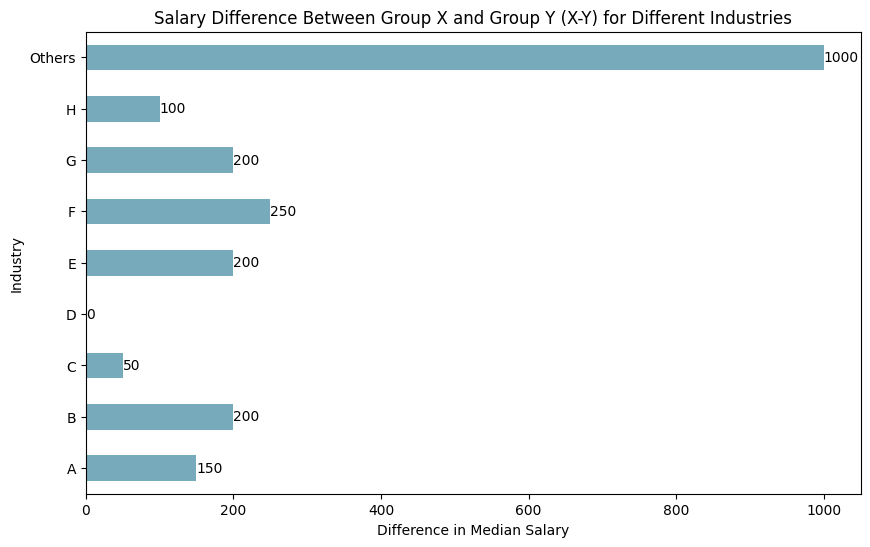

In [17]:
plt.figure(figsize=(10, 6))
ax = differential_df['Salary Difference Between Group X and Group Y (X-Y)'].plot(kind='barh',
                                                                      color = (differential_df["Salary Difference Between Group X and Group Y (X-Y)"] > 0).map({True:'#77aabb', False:'#eeddaa'}))

plt.title("Salary Difference Between Group X and Group Y (X-Y) for Different Industries")
plt.xlabel("Difference in Median Salary")
plt.ylabel("Industry")
ylabels = differential_df.Industry.tolist()
ax.set_yticklabels(labels = ylabels)
for i in ax.containers:
    ax.bar_label(i,)

In [18]:
sns.color_palette("husl").as_hex()

['#f77189', '#bb9832', '#50b131', '#36ada4', '#3ba3ec', '#e866f4']

In [19]:
col = sns.color_palette("husl").as_hex()[:3]
col

['#f77189', '#bb9832', '#50b131']

In [20]:
distinct_job_nature = differential_df['Job Nature'].unique()
distinct_job_nature

array(['Closely related to course of study',
       'Somewhat related to course of study',
       'Unrelated to course of study'], dtype=object)

In [21]:
job_nature_map = dict(zip(distinct_job_nature, col))
job_nature_map

{'Closely related to course of study': '#f77189',
 'Somewhat related to course of study': '#bb9832',
 'Unrelated to course of study': '#50b131'}

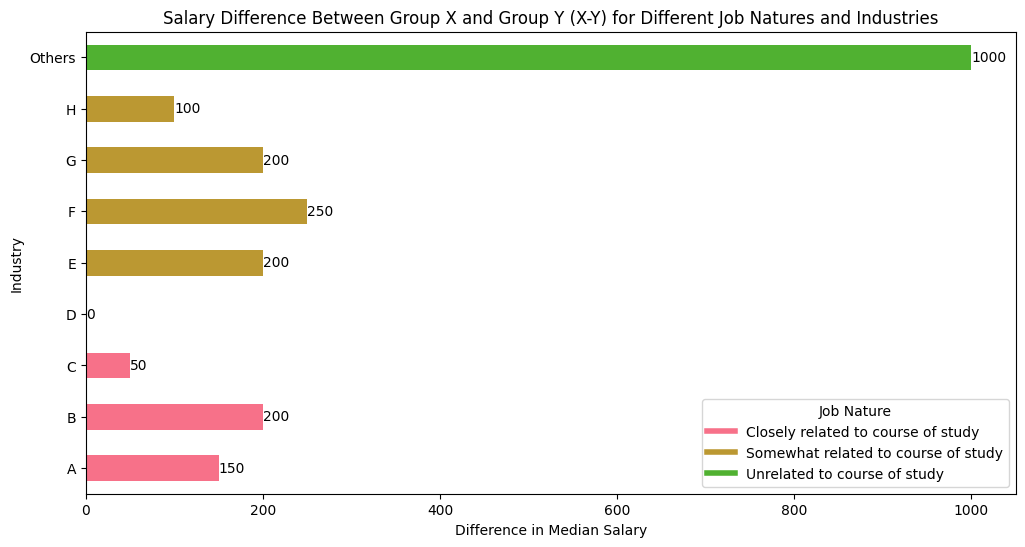

In [22]:
plt.figure(figsize=(12, 6))
ax = differential_df['Salary Difference Between Group X and Group Y (X-Y)'].plot(kind='barh',
                                                                     color=[job_nature_map[group] for group in differential_df['Job Nature']])

plt.title("Salary Difference Between Group X and Group Y (X-Y) for Different Job Natures and Industries")
plt.xlabel("Difference in Median Salary")
plt.ylabel("Industry")
ylabels = differential_df.Industry.tolist()
ax.set_yticklabels(labels = ylabels)
for i in ax.containers:
    ax.bar_label(i,)

# Create a legend with labels for the three categories
legend_labels = [plt.Line2D([0], [0], color=job_nature_map[category], lw=4, label=category) for category in job_nature_map.keys()]
plt.legend(handles=legend_labels, title='Job Nature')



In [24]:
differential_df.columns

Index(['Industry', 'Job Nature',
       'Salary Difference Between Group X and Group Y (X-Y)'],
      dtype='object')

In [25]:
differential_df

,Industry,Job Nature,Salary Difference Between Group X and Group Y (X-Y)
0,A,Closely related to course of study,150
1,B,Closely related to course of study,200
2,C,Closely related to course of study,50
3,D,Closely related to course of study,0
4,E,Somewhat related to course of study,200
5,F,Somewhat related to course of study,250
6,G,Somewhat related to course of study,200
7,H,Somewhat related to course of study,100
8,Others,Unrelated to course of study,1000


In [26]:
summary = pd.pivot_table(data=differential_df,index='Industry',columns='Job Nature',values='Salary Difference Between Group X and Group Y (X-Y)')
summary

Job Nature,Closely related to course of study,Somewhat related to course of study,Unrelated to course of study
Industry,,,
A,150.0,NaN,NaN
B,200.0,NaN,NaN
C,50.0,NaN,NaN
D,0.0,NaN,NaN
E,NaN,200.0,NaN
F,NaN,250.0,NaN
G,NaN,200.0,NaN
H,NaN,100.0,NaN
Others,NaN,NaN,1000.0
